# Bollinger BandWidth

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:bollinger_band_width

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^NSEBANK'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00+05:30,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600
2020-01-03 00:00:00+05:30,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600
2020-01-06 00:00:00+05:30,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200
2020-01-07 00:00:00+05:30,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400
2020-01-08 00:00:00+05:30,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500


In [3]:
n = 20
MA = pd.Series(df['Adj Close'].rolling(n).mean())
STD = pd.Series(df['Adj Close'].rolling(n).std())
bb1 = MA + 2*STD
df['Upper Bollinger Band'] = pd.Series(bb1)
bb2 = MA - 2*STD
df['Lower Bollinger Band'] = pd.Series(bb2)
df['SMA'] = df['Adj Close'].rolling(n).mean()

In [4]:
df['BBWidth'] = (df['Upper Bollinger Band'] - df['Lower Bollinger Band'])/df['SMA'] * 100

Text(0.5, 0, 'Date')

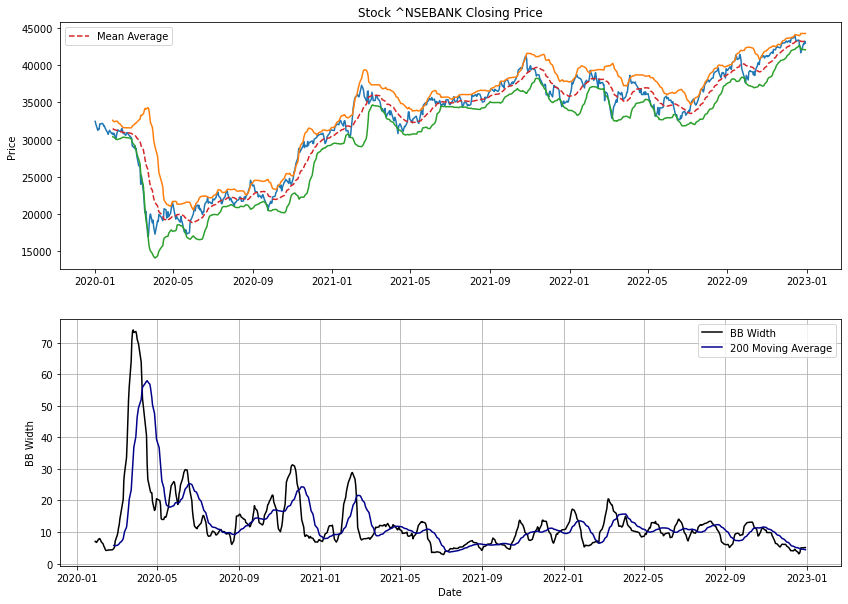

In [5]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.plot(df['Upper Bollinger Band'])
ax1.plot(df['Lower Bollinger Band'])
ax1.plot(df['Adj Close'].rolling(20).mean(), label='Mean Average', linestyle='--')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['BBWidth'], label='BB Width', color='black')
ax2.plot(df['BBWidth'].rolling(20).mean(), label='200 Moving Average', color='darkblue')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('BB Width')
ax2.set_xlabel('Date')

## Candlestick with BB Width

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Upper Bollinger Band,Lower Bollinger Band,SMA,BBWidth,VolumePositive
0,18262.770833,32133.150391,32465.449219,32121.400391,32443.849609,32443.472656,253600,NaN,NaN,NaN,NaN,True
1,18263.770833,32326.949219,32329.800781,31960.400391,32069.250000,32068.876953,217600,NaN,NaN,NaN,NaN,False
2,18266.770833,31910.449219,31914.449219,31170.550781,31237.150391,31236.787109,256200,NaN,NaN,NaN,NaN,False
3,18267.770833,31598.050781,31851.449219,31200.900391,31399.400391,31399.035156,294400,NaN,NaN,NaN,NaN,False
4,18268.770833,30995.500000,31451.849609,30899.550781,31373.650391,31373.285156,304500,NaN,NaN,NaN,NaN,True


Text(0.5, 0, 'Date')

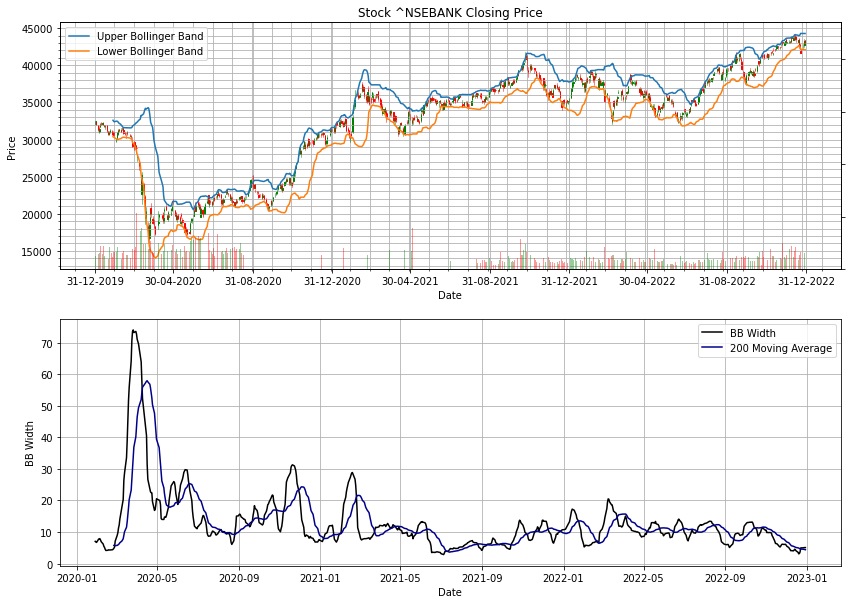

In [9]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['Upper Bollinger Band'], label='Upper Bollinger Band')
ax1.plot(df['Lower Bollinger Band'], label='Lower Bollinger Band')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['BBWidth'], label='BB Width', color='black')
ax2.plot(df['BBWidth'].rolling(20).mean(), label='200 Moving Average', color='darkblue')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('BB Width')
ax2.set_xlabel('Date')